<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>GANs Condicionales</center></span>

<figure>
<center>
<img src="../Imagenes/Rock_paper_scissors_he.jpg" width="600" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Piedra papel y tijera </p>
</figcaption>
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:Rock_paper_scissors_he.jpg">​[[::Main Page|commons]] user [[::User:Vix929|Vix929]]</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>, via Wikimedia Commons

## <span style="color:#4361EE">Coordinador</span>

- Campo Elías Pardo Turriago, cepardot@unal.edu.co 

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

6. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

7. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

8. Dairo Moreno, damoralesj@unal.edu.co
9. Joan Castro, jocastroc@unal.edu.co
10. Bryan Riveros, briveros@unal.edu.co
11. Rosmer Vargas, rovargasc@unal.edu.co
12. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:blue">Referencias</span>

1. [Rowel Atiesa, Advanced Deep Learning with Tensorflow 2 and Keras, second ed., Pack, 2020](https://www.oreilly.com/library/view/advanced-deep-learning/9781838821654/)
1. [Ejemplos de Keras](https://keras.io/examples/generative/dcgan_overriding_train_step/)
1. [Tutoriales-Tensorflow](https://www.tensorflow.org/tutorials/generative/dcgan)
1. [Soumith, How to Train a GAN? Tips and tricks to make GANs workHow to Train a GAN? Tips and tricks to make GANs work](https://github.com/soumith/ganhacks/blob/master/README.mdhttps://github.com/soumith/ganhacks/blob/master/README.md), in Github.

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Con un vector y con una clase....](#Con-un-vector-y-con-una-clase....)
* [Componentes de una GAN](#Componentes-de-una-GAN)
* [Generación de Piedra, Papel o Tijeras](#Generación-de-Piedra,-Papel-o-Tijeras)

## <span style="color:blue">Introducción</span>

Como se habló anteriormente cuando se mostró [StyleGAN](../Cuadernos/redes_generativas_adversarias.ipynb#StyleGAN), y como indirectamente se demostró cuando generamos [Rostros artificialmente](../Cuadernos/DCGAN.ipynb), en el modelo clásico de Redes Generativas Adversarias tenemos un control muy limitado sobre lo que queremos que se genere. Podemos crear un modelo que genere números a mano, pero luego no podemos decirle que queremos que nos genere un 8. 

Así que, si se busca que la red genere resultados específicos se podría Alimentar datos especializados, lo cual le quita robustez al modelo, o podríamos hacer que la red generadora sea capaz de diferenciar diferentes clases. Logrando así, la capacidad de elegir el tipo de output que queremos obtener.

## <span style="color:blue">Con un vector y con una clase.....</span>

La idea principal de las GANs condicionales es el agregar una nuevo tipo de información tanto en los datos reales, como en los vectores aleatorios de entrada para la generación: Clases. Aunque esto parezca una respuesta obvia, no se usan de la forma que se espera.

A nivel de la base de datos real, la estructura del dataset vuelve a ser más clásica. Hacemos la separación clásica entre los labels de interés, mientras se agrega la clase "verdadero" a cada uno. En la generación de bases de datos, además del vector aleatorio que se convertirá en nuestra imagen, le entregamos una de estas clases, dándole una "condición" sobre el tipo de dato que debería estar generando para obtener mejores resultados. De forma resumida, tomamos las clases, usualmente tomadas como la variable respuesta, como una nueva variable de observación

¿Cómo cambian nuestras redes en este caso?

- La red discriminadora gana una buena ventaja, ya que puede discernir la falsedad de una imagen si su clase no coincide. Así que, el discriminador debe ser capaz de:
    - Aceptar el par imagen-clase reales
    - discriminar el par imagen-clase falsos, con clase correcta
    - discriminar el par imagen-clase falsos, con clase incorrecta

- La red generadora, en este nuevo caso, ya no es suficiente el hacer la imagen más realista posible. ahora tiene que ser consciente del tipo de imagen que le están pidiendo. 

<figure>
<center>
<img src="../Imagenes/cgan.png" width="500" height="450" align="center"/> 
</center>
</figure>

Como podemos apreciar, este cambio es uno bastante sencillo de aplicar, que mejora la convergencia de la red, y le da más opciones al usuario. Razón por la cual se ha tomado como un estándar o una recomendación a la hora de desarrollar GANs

## <span style="color:blue">Generación de Piedra, Papel o Tijeras</span>

Tomaremos el dataset RPM, el cual ya hemos trabajado en [Transfer Learning](../Cuadernos/taller_transfer_learning.ipynb), usaremos la arquitectura profunda de [DCGANs](../Cuadernos/DCGAN.ipynb), y la acondicionaremos a un mejor resultado

In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /mnt/storage/Datasets/rps/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /mnt/storage/Datasets/rps/rps-test-set.zip

--2022-05-12 13:06:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.173.48, 172.217.173.208, 142.250.78.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.173.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/mnt/storage/Datasets/rps/rps.zip’

/mnt/storage/Datase 100%[===================>] 191.38M  10.4MB/s    in 18s     

2022-05-12 13:06:19 (10.7 MB/s) - ‘/mnt/storage/Datasets/rps/rps.zip’ saved [200682221/200682221]

--2022-05-12 13:06:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.28.112, 142.250.78.112, 172.217.173.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.28.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 295167

In [3]:
import os
import zipfile

local_zip = '/mnt/storage/Datasets/rps/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/mnt/storage/Datasets/rps')
zip_ref.close()
local_zip = '/mnt/storage/Datasets/rps/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip)
zip_ref.extractall('/mnt/storage/Datasets/rps')
zip_ref.close()

In [4]:
torch.manual_seed(1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 128

In [5]:
train_transform = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])])
train_dataset = datasets.ImageFolder(root='/mnt/storage/Datasets/rps', transform=train_transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [6]:
def show_images(images):
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images.detach(), nrow=22).permute(1, 2, 0))

def show_batch(dl):
    for images, _ in dl:
        show_images(images)
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


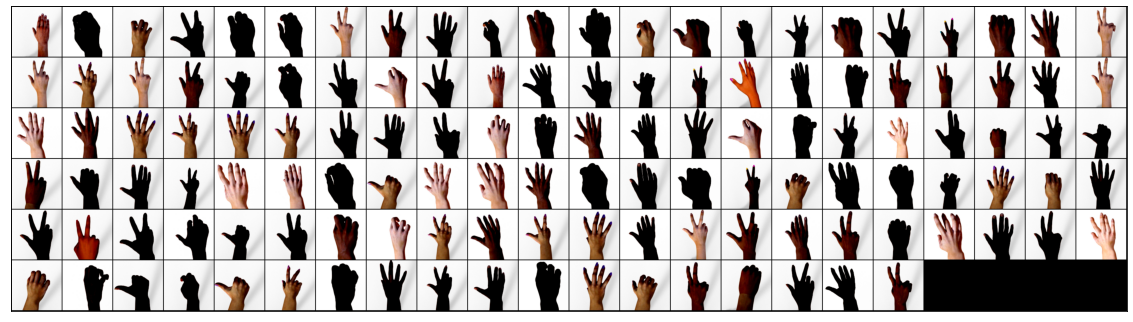

In [7]:
show_batch(train_loader)

In [8]:
image_shape = (3, 128, 128)
image_dim = int(np.prod(image_shape))
latent_dim = 100

In [9]:
n_classes = 3
embedding_dim = 100

In [10]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [11]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
     
        self.label_conditioned_generator = nn.Sequential(nn.Embedding(n_classes, embedding_dim),
                      nn.Linear(embedding_dim, 16))
        
    
        self.latent = nn.Sequential(nn.Linear(latent_dim, 4*4*512),
                                   nn.LeakyReLU(0.2, inplace=True))
           

        self.model = nn.Sequential(nn.ConvTranspose2d(513, 64*8, 4, 2, 1, bias=False),
                      nn.BatchNorm2d(64*8, momentum=0.1,  eps=0.8),
                      nn.ReLU(True),
                      nn.ConvTranspose2d(64*8, 64*4, 4, 2, 1,bias=False),
                      nn.BatchNorm2d(64*4, momentum=0.1,  eps=0.8),
                      nn.ReLU(True), 
                      nn.ConvTranspose2d(64*4, 64*2, 4, 2, 1,bias=False),
                      nn.BatchNorm2d(64*2, momentum=0.1,  eps=0.8),
                      nn.ReLU(True), 
                      nn.ConvTranspose2d(64*2, 64*1, 4, 2, 1,bias=False),
                      nn.BatchNorm2d(64*1, momentum=0.1,  eps=0.8),
                      nn.ReLU(True), 
                      nn.ConvTranspose2d(64*1, 3, 4, 2, 1, bias=False),
                      nn.Tanh())

    def forward(self, inputs):
        noise_vector, label = inputs
        label_output = self.label_conditioned_generator(label)
        label_output = label_output.view(-1, 1, 4, 4)
        latent_output = self.latent(noise_vector)
        latent_output = latent_output.view(-1, 512,4,4)
        concat = torch.cat((latent_output, label_output), dim=1)
        image = self.model(concat)
        #print(image.size())
        return image

generator = Generator().to(device)
generator.apply(weights_init)


Generator(
  (label_conditioned_generator): Sequential(
    (0): Embedding(3, 100)
    (1): Linear(in_features=100, out_features=16, bias=True)
  )
  (latent): Sequential(
    (0): Linear(in_features=100, out_features=8192, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (model): Sequential(
    (0): ConvTranspose2d(513, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_si

In [12]:
a = torch.ones(100)
b = torch.ones(1)
b = b.long()
a = a.to(device)
b = b.to(device)

In [13]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        
    
        self.label_condition_disc = nn.Sequential(nn.Embedding(n_classes, embedding_dim),
                      nn.Linear(embedding_dim, 3*128*128))
             
        self.model = nn.Sequential(nn.Conv2d(6, 64, 4, 2, 1, bias=False),
                      nn.LeakyReLU(0.2, inplace=True),
                      nn.Conv2d(64, 64*2, 4, 3, 2, bias=False),
                      nn.BatchNorm2d(64*2, momentum=0.1,  eps=0.8),
                      nn.LeakyReLU(0.2, inplace=True),
                      nn.Conv2d(64*2, 64*4, 4, 3,2, bias=False),
                      nn.BatchNorm2d(64*4, momentum=0.1,  eps=0.8),
                      nn.LeakyReLU(0.2, inplace=True),
                      nn.Conv2d(64*4, 64*8, 4, 3, 2, bias=False),
                      nn.BatchNorm2d(64*8, momentum=0.1,  eps=0.8),
                      nn.LeakyReLU(0.2, inplace=True), 
                      nn.Flatten(),
                      nn.Dropout(0.4),
                      nn.Linear(4608, 1),
                      nn.Sigmoid()
                     )

    def forward(self, inputs):
        img, label = inputs
        label_output = self.label_condition_disc(label)
        label_output = label_output.view(-1, 3, 128, 128)
        concat = torch.cat((img, label_output), dim=1)
        #print(concat.size())
        output = self.model(concat)
        return output

discriminator = Discriminator().to(device)
discriminator.apply(weights_init)

Discriminator(
  (label_condition_disc): Sequential(
    (0): Embedding(3, 100)
    (1): Linear(in_features=100, out_features=49152, bias=True)
  )
  (model): Sequential(
    (0): Conv2d(6, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(3, 3), padding=(2, 2), bias=False)
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(3, 3), padding=(2, 2), bias=False)
    (6): BatchNorm2d(256, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(3, 3), padding=(2, 2), bias=False)
    (9): BatchNorm2d(512, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)


In [14]:
a = torch.ones(2,3,128,128)
b = torch.ones(2,1)
b = b.long()
a = a.to(device)
b = b.to(device)

In [15]:
c = discriminator((a,b))
c.size()

torch.Size([2, 1])

In [16]:
adversarial_loss = nn.BCELoss()

In [17]:
def generator_loss(fake_output, label):
    gen_loss = adversarial_loss(fake_output, label)
    return gen_loss

In [18]:
def discriminator_loss(output, label):
    disc_loss = adversarial_loss(output, label)
    return disc_loss

In [19]:
learning_rate = 0.0002 
G_optimizer = optim.Adam(generator.parameters(), lr = learning_rate, betas=(0.5, 0.999))
D_optimizer = optim.Adam(discriminator.parameters(), lr = learning_rate, betas=(0.5, 0.999))

In [21]:
num_epochs = 100
D_loss_plot, G_loss_plot = [], []
for epoch in range(1, num_epochs+1): 

    D_loss_list, G_loss_list = [], []
   
    for index, (real_images, labels) in enumerate(train_loader):
        D_optimizer.zero_grad()
        real_images = real_images.to(device)
        labels = labels.to(device)
        labels = labels.unsqueeze(1).long()

      
        real_target = Variable(torch.ones(real_images.size(0), 1).to(device))
        fake_target = Variable(torch.zeros(real_images.size(0), 1).to(device))
      
        D_real_loss = discriminator_loss(discriminator((real_images, labels)), real_target)
        # print(discriminator(real_images))
        #D_real_loss.backward()
    
        noise_vector = torch.randn(real_images.size(0), latent_dim, device=device)  
        noise_vector = noise_vector.to(device)
        
       
        generated_image = generator((noise_vector, labels))
        output = discriminator((generated_image.detach(), labels))
        D_fake_loss = discriminator_loss(output,  fake_target)

    
        # train with fake
        #D_fake_loss.backward()
      
        D_total_loss = (D_real_loss + D_fake_loss) / 2
        D_loss_list.append(D_total_loss)
      
        D_total_loss.backward()
        D_optimizer.step()

        # Train generator with real labels
        G_optimizer.zero_grad()
        G_loss = generator_loss(discriminator((generated_image, labels)), real_target)
        G_loss_list.append(G_loss)

        G_loss.backward()
        G_optimizer.step()
        
    print('Epoch: [%d/%d]: D_loss: %.3f, G_loss: %.3f' % (
            (epoch), num_epochs, torch.mean(torch.FloatTensor(D_loss_list)),\
             torch.mean(torch.FloatTensor(G_loss_list))))
    
    D_loss_plot.append(torch.mean(torch.FloatTensor(D_loss_list)))
    G_loss_plot.append(torch.mean(torch.FloatTensor(G_loss_list)))

Epoch: [1/100]: D_loss: 0.198, G_loss: 2.889
Epoch: [2/100]: D_loss: 0.400, G_loss: 1.976
Epoch: [3/100]: D_loss: 0.301, G_loss: 2.029
Epoch: [4/100]: D_loss: 0.379, G_loss: 2.355
Epoch: [5/100]: D_loss: 0.289, G_loss: 2.145
Epoch: [6/100]: D_loss: 0.415, G_loss: 2.795
Epoch: [7/100]: D_loss: 0.377, G_loss: 2.087
Epoch: [8/100]: D_loss: 0.515, G_loss: 1.539
Epoch: [9/100]: D_loss: 0.428, G_loss: 1.536
Epoch: [10/100]: D_loss: 0.509, G_loss: 2.145
Epoch: [11/100]: D_loss: 0.534, G_loss: 1.793
Epoch: [12/100]: D_loss: 0.495, G_loss: 1.755
Epoch: [13/100]: D_loss: 0.490, G_loss: 1.690
Epoch: [14/100]: D_loss: 0.487, G_loss: 1.555
Epoch: [15/100]: D_loss: 0.530, G_loss: 1.488
Epoch: [16/100]: D_loss: 0.493, G_loss: 1.550
Epoch: [17/100]: D_loss: 0.534, G_loss: 1.500
Epoch: [18/100]: D_loss: 0.454, G_loss: 1.566
Epoch: [19/100]: D_loss: 0.453, G_loss: 1.679
Epoch: [20/100]: D_loss: 0.426, G_loss: 1.701
Epoch: [21/100]: D_loss: 0.414, G_loss: 1.788
Epoch: [22/100]: D_loss: 0.396, G_loss: 1.8

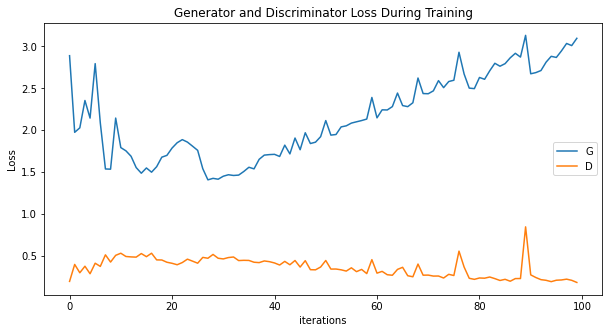

In [22]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_loss_plot,label="G")
plt.plot(D_loss_plot,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [26]:
def generate_latent_points(latent_dim, n_samples, n_classes=3):
    # genera puntos en un espacio latente
    x_input = np.random.randn(latent_dim * n_samples)
    # se cambia la forma en un lote de datos de entrada para la red
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

# interpolación intermitente entre dos puntos en un espacio latente
def interpolate_points(p1, p2, n_steps=10):
    # interpolación de rata en el espacio
    ratios = np.linspace(0, 1, num=n_steps)
    # vectores lineales interpolados
    vectors = list()
    for ratio in ratios:
        v = (1.0 - ratio) * p1 + ratio * p2
        vectors.append(v)
    return np.asarray(vectors)


pts = generate_latent_points(100, 3)
# interpola los puntos en el espacio latente
interpolated = interpolate_points(pts[0], pts[1])

interpolated = torch.tensor(interpolated)
interpolated = interpolated.to(device)
interpolated = interpolated.type(torch.float32)

output = None
for label in range(3):
    labels = torch.ones(10) * label
    labels = labels.to(device)
    labels = labels.unsqueeze(1).long()
    print(labels.size())
    predictions = generator((interpolated, labels))
    predictions = predictions.permute(0,2,3,1)
    pred = predictions.detach().cpu()
    if output is None:
        output = pred
    else:
        output = np.concatenate((output,pred))

torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([10, 1])


In [27]:
output.shape

(30, 128, 128, 3)

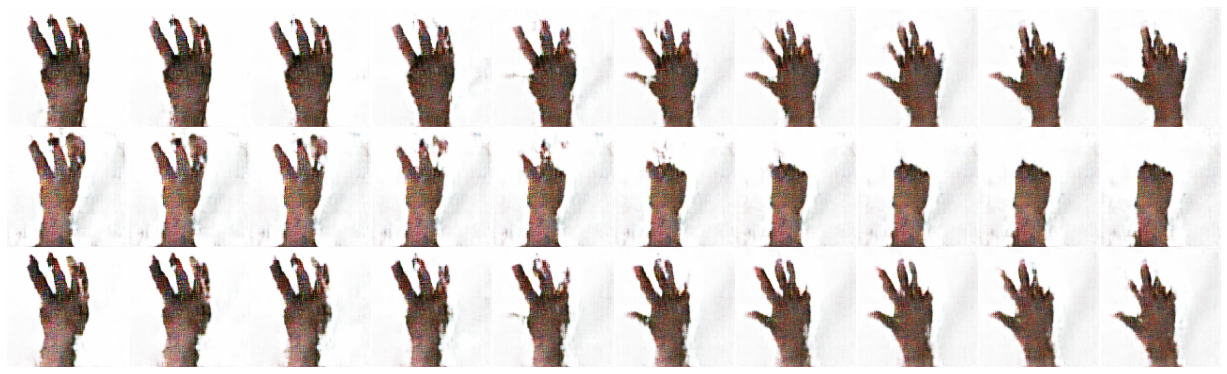

In [28]:
nrow = 3
ncol = 10
fig = plt.figure(figsize=(25,25))
gs = gridspec.GridSpec(nrow, ncol, width_ratios=[1, 1, 1,1, 1,1, 1, 1, 1, 1],
     wspace=0.0, hspace=0.0, top=0.2, bottom=0.00, left=0.17, right=0.845) 

k = 0
for i in range(nrow):
    for j in range(ncol):
        pred = (output[k, :, :, :] + 1 ) * 127.5
        pred = np.array(pred)  
        ax= plt.subplot(gs[i,j])
        ax.imshow(pred.astype(np.uint8))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.axis('off')
        k += 1   


#plt.savefig('result_torch.png',  dpi=300)
plt.show()